In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline


In [3]:
df=pd.read_csv("Travel_and_Commuting_Preferences_cleaned.csv")

In [4]:
df.head()

,Unnamed: 0,Name,Age,Gender,Mode_of_transport,Distance(in_km),Time_taken(min),Amount_spent_monthly,Satisfaction
0,0,Vedant Sunil Patil,17,Male,Bus,20.0,120.0,800.0,3
1,1,VISHISHT PAL,17,Male,Bike/ Scoter (Petrol),3.0,10.0,500.0,3
2,4,Yash Dharao,19,Male,Bike/ Scoter (Petrol),12.0,25.0,2000.0,3
3,5,Raj Upadhye,19,Male,Walking,1.2,30.0,0.0,5
4,6,Romit,18,Male,Bus,5.0,20.0,15.0,5


In [5]:
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Gender', 'Mode_of_transport',
       'Distance(in_km)', 'Time_taken(min)', 'Amount_spent_monthly',
       'Satisfaction'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,Name,Age,Gender,Mode_of_transport,Distance(in_km),Time_taken(min),Amount_spent_monthly,Satisfaction
0,Vedant Sunil Patil,17,Male,Bus,20.0,120.0,800.0,3
1,VISHISHT PAL,17,Male,Bike/ Scoter (Petrol),3.0,10.0,500.0,3
2,Yash Dharao,19,Male,Bike/ Scoter (Petrol),12.0,25.0,2000.0,3
3,Raj Upadhye,19,Male,Walking,1.2,30.0,0.0,5
4,Romit,18,Male,Bus,5.0,20.0,15.0,5


In [8]:
df.describe()

,Age,Distance(in_km),Time_taken(min),Amount_spent_monthly,Satisfaction
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,19.027778,16.267639,40.305556,2377.569444,3.069444
std,3.002216,8.631108,23.947501,1621.451619,1.387331
min,5.000000,0.570000,5.000000,0.000000,1.000000
25%,17.750000,9.750000,21.500000,1067.250000,2.000000
50%,18.000000,18.000000,34.500000,2213.500000,3.000000
75%,21.000000,22.250000,57.250000,3101.000000,4.000000
max,29.000000,30.000000,120.000000,10000.000000,5.000000


In [20]:
df['Mode_of_transport']=df['Mode_of_transport'].str.replace("Local ","")
df['Mode_of_transport']=df['Mode_of_transport'].str.replace("Scooter","Scoter")


In [21]:
df['Mode_of_transport'].unique()

array(['Bus', 'Bike/ Scoter (Petrol)', 'Walking', 'Train', 'Bicycle',
       'EV', 'Rickshaw', 'Carpool'], dtype=object)

In [34]:
x_num

['Distance(in_km)', 'Time_taken(min)']

In [32]:
df['Distance(in_km)'].dtype

dtype('float64')

In [47]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler ,OneHotEncoder
from sklearn.compose import ColumnTransformer
x=df['Distance(in_km)']
y=df['Amount_spent_monthly']
x_num=[i for i in x.columns if df[i].dtype == 'float64']
x_cat=[i for i in x.columns if i not in x_num]
transformer=ColumnTransformer(transformers=[("labelencoder",OneHotEncoder(),x_cat),("StandardScaler",StandardScaler(),x_num)])
x=transformer.fit_transform(x)

AttributeError: 'Series' object has no attribute 'columns'

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
models={"LinearRegression":LinearRegression(),"Ridge":Ridge(),"Lasso":Lasso(),"RandomForestRegressor":RandomForestRegressor(),
        "DecisionTreeRegressor":DecisionTreeRegressor(),"KNeighborsRegressor":KNeighborsRegressor()}


for model_name,model in models.items() :
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    ## printing the metrics 
    print(f"-----------------({model_name}-----------------)")
    print(f"-root_mean_squared_error : {root_mean_squared_error(y_test,y_pred)}")
    print(f"-mean_absolute_error : {mean_absolute_error(y_test,y_pred)}")
    print(f"-mean_squared_error : {mean_squared_error(y_test,y_pred)}")
    print(f"-r2_score : {r2_score(y_test,y_pred)}")
    print("=================================================")
    print("\n \n")





-----------------(LinearRegression-----------------)
-root_mean_squared_error : 1705.7448339433183
-mean_absolute_error : 1497.7325711657602
-mean_squared_error : 2909565.438524319
-r2_score : -0.9155187255146424

 

-----------------(Ridge-----------------)
-root_mean_squared_error : 1702.0268585395386
-mean_absolute_error : 1494.9026142415628
-mean_squared_error : 2896895.4271899704
-r2_score : -0.9071773960356475

 

-----------------(Lasso-----------------)
-root_mean_squared_error : 1705.1436984832926
-mean_absolute_error : 1497.2762056647114
-mean_squared_error : 2907515.032477282
-r2_score : -0.9141688362404559

 

-----------------(RandomForestRegressor-----------------)
-root_mean_squared_error : 1991.1739871496973
-mean_absolute_error : 1245.6582744708994
-mean_squared_error : 3964773.847101623
-r2_score : -1.6102174730277707

 

-----------------(DecisionTreeRegressor-----------------)
-root_mean_squared_error : 2162.1098584770057
-mean_absolute_error : 1370.5370370370372
-m

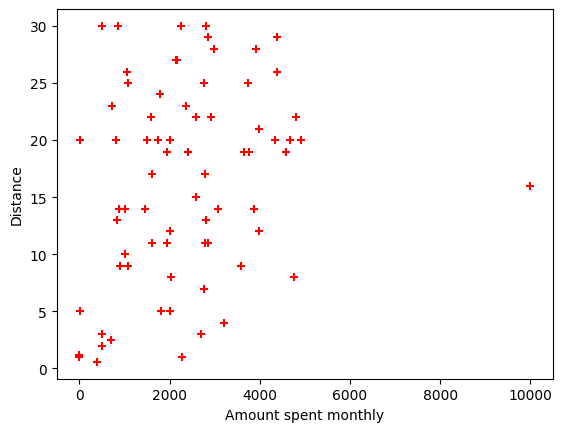

In [13]:
plt.scatter(df['Amount_spent_monthly'],df['Distance(in_km)'],marker='+',color='red')
plt.xlabel("Amount spent monthly")
plt.ylabel("Distance")
plt.show()